In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import sklearn
import os
%matplotlib inline
from tensorflow.keras import Sequential
import tensorflow as tf
import tensorflow.keras.layers
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import tensorflow.keras.losses

In [14]:
df = pd.read_csv("../../GLIF_dataset.csv")

/Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
# df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
display(df['severity'].value_counts())
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

medium       5522
small        2596
unknown       827
large         778
...           357
Unknown        19
landslide       2
Name: severity, dtype: int64

In [17]:
def convert(field, func):
	global df
	df[field] = df[field].apply(func)

In [18]:
X = df.copy()
y = X.landslide
columns=[]
for i in range(9, 2, -1):
    columns.append('humidity' + str(i))
    columns.append('ARI' + str(i))
X = X[columns]
for i in range(9, 2, -1):
#     X['ARI' + str(i)] = X['ARI' + str(i)].apply(float)
    print(X['ARI' + str(i)].dtypes)
X

float64
float64
float64
float64
float64
float64
float64


,humidity9,ARI9,humidity8,ARI8,humidity7,ARI7,humidity6,ARI6,humidity5,ARI5,humidity4,ARI4,humidity3,ARI3
0,88,3.213674,68,1.920537,92,5.646332,95,44.401469,92,21.932705,87,9.438918,92,23.445983
1,99,13.870376,99,15.023235,99,9.013662,99,7.728608,99,11.283893,99,19.534317,99,20.903275
2,47,0.818951,48,0.464330,49,0.063222,46,0.040498,53,0.000000,52,0.000000,51,0.000000
3,100,8.423505,100,13.015446,100,6.876906,96,2.691581,98,2.473345,100,6.423965,100,3.494707
4,87,18.179277,90,13.880922,91,14.968099,85,34.454695,86,34.862513,86,13.866170,89,20.622561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20103,99,5.157585,84,1.470840,91,0.703045,83,0.413783,92,0.471531,99,0.373742,91,0.141517
20104,87,0.272873,96,0.221388,96,0.049610,91,0.485074,96,14.349644,96,10.229401,95,3.466717
20105,57,0.000000,56,0.000000,50,0.330732,55,0.479562,55,0.135968,68,0.064768,62,0.038034
20106,86,0.000000,88,0.000000,87,0.000000,87,0.000000,83,0.926050,88,0.892977,82,0.665139


In [19]:
y.value_counts()

1    10101
0    10007
Name: landslide, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16086, 14)
(16086,)
(4022, 14)
(4022,)


In [41]:
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# len(X_train) # of batches
# 5 timesteps (days 7 - 3)
# 2 features per timestep
X_train=X_train.reshape((len(X_train), 7, 2))
X_test=X_test.reshape((len(X_test), 7, 2))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train[0]

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)


(16086, 7, 2)
(16086,)
(4022, 7, 2)
(4022,)


In [42]:
original = Sequential()
original.add(Bidirectional(LSTM(11)))
original.add(Dense(100))
original.add(Dense(1))
original.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
original.fit(X_train, y_train, epochs = 15, batch_size = 20, verbose = 2)
# res = LSTM(11)
# out = res(X_train)
# print(out.shape)

Epoch 1/15


NotImplementedError: in user code:

    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:389 call
        outputs = layer(inputs, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/wrappers.py:539 __call__
        return super(Bidirectional, self).__call__(inputs, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/wrappers.py:652 call
        y = self.forward_layer(forward_inputs,
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:660 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent_v2.py:1157 call
        inputs, initial_state, _ = self._process_inputs(inputs, initial_state, None)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:859 _process_inputs
        initial_state = self.get_initial_state(inputs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:642 get_initial_state
        init_state = get_initial_state_fn(
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:2506 get_initial_state
        return list(_generate_zero_filled_state_for_cell(
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:2987 _generate_zero_filled_state_for_cell
        return _generate_zero_filled_state(batch_size, cell.state_size, dtype)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:3003 _generate_zero_filled_state
        return nest.map_structure(create_zeros, state_size)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/util/nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/util/nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/keras/layers/recurrent.py:3000 create_zeros
        return array_ops.zeros(init_state_size, dtype=dtype)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2819 wrapped
        tensor = fun(*args, **kwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2868 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:2804 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3051 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    /Users/shreyjoshi/opt/anaconda3/envs/glas/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:852 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (sequential_5/bidirectional_5/forward_lstm_5/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


In [90]:
original.evaluate(X_test, y_test)

112/112 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.6814


[0.5945157408714294, 0.681358814239502]

In [91]:
# 11 units: 0.5952649116516113
# 15 units: 0.59

In [107]:
from sklearn.metrics import confusion_matrix
res = original.predict(X_test)
res = np.rint(res)
pred = np.array([int(i) for i in res])
pred

array([1, 1, 0, ..., 1, 0, 1])

In [108]:
zeroes = 0
ones = 0
for i in pred:
    if i == 0:
        zeroes += 1
    else:
        ones += 1
print(zeroes, ones)

870 2692


In [109]:
zeroes = 0
ones = 0
for i in y_test:
    if i == 0:
        zeroes += 1
    else:
        ones += 1
print(zeroes, ones)

1501 2061


In [110]:
array = confusion_matrix(y_test, pred)
array

array([[ 618,  883],
       [ 252, 1809]])

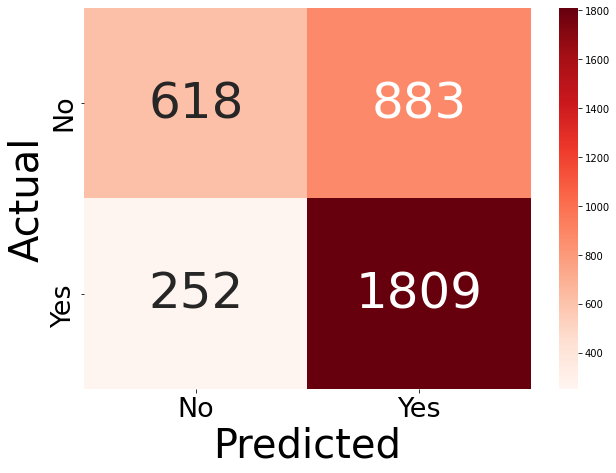

In [111]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = True
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Reds", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 

plt.savefig("LSTM Confusion Matrix")
plt.show()

In [101]:
model = Sequential()
model.add(Bidirectional(LSTM(11)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, epochs = 15, batch_size = 20, verbose = 2)

Epoch 1/15
713/713 - 2s - loss: 0.6218 - accuracy: 0.6670
Epoch 2/15
713/713 - 2s - loss: 0.5896 - accuracy: 0.6906
Epoch 3/15
713/713 - 2s - loss: 0.5870 - accuracy: 0.6948
Epoch 4/15
713/713 - 2s - loss: 0.5856 - accuracy: 0.6958
Epoch 5/15
713/713 - 2s - loss: 0.5853 - accuracy: 0.6947
Epoch 6/15
713/713 - 2s - loss: 0.5844 - accuracy: 0.6982
Epoch 7/15
713/713 - 2s - loss: 0.5841 - accuracy: 0.6975
Epoch 8/15
713/713 - 2s - loss: 0.5851 - accuracy: 0.6975
Epoch 9/15
713/713 - 2s - loss: 0.5835 - accuracy: 0.6990
Epoch 10/15
713/713 - 2s - loss: 0.5829 - accuracy: 0.6979
Epoch 11/15
713/713 - 2s - loss: 0.5851 - accuracy: 0.6958
Epoch 12/15
713/713 - 2s - loss: 0.5833 - accuracy: 0.6965
Epoch 13/15
713/713 - 2s - loss: 0.5830 - accuracy: 0.6989
Epoch 14/15
713/713 - 2s - loss: 0.5830 - accuracy: 0.6994
Epoch 15/15
713/713 - 2s - loss: 0.5830 - accuracy: 0.6977


In [118]:
from sklearn.metrics import confusion_matrix
res = model.predict(X_test)
res = np.rint(res)
pred = np.array([int(i) for i in res])
pred

array([1, 1, 0, ..., 1, 0, 1])

In [119]:
model.evaluate(X_test, y_test)

112/112 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.6909


[0.591059148311615, 0.6909039616584778]

In [2]:
array = confusion_matrix(y_test, pred)
array

[[642, 859], [242, 1819]]

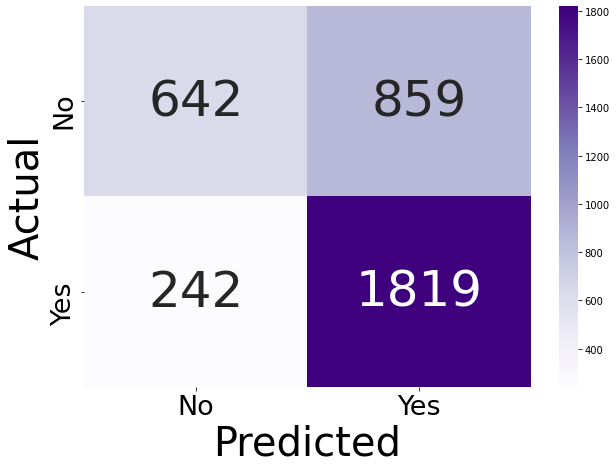

In [3]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = True
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Purples", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 

plt.savefig("LSTM Sigmoid Confusion Matrix")
plt.show()

In [115]:
model2 = Sequential()
model2.add(Bidirectional(LSTM(15)))
model2.add(Dense(1))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model2.fit(X_train, y_train, epochs = 30, batch_size = 20, verbose = 2)

Epoch 1/30
713/713 - 2s - loss: 0.6706 - accuracy: 0.6346
Epoch 2/30
713/713 - 2s - loss: 0.6008 - accuracy: 0.6852
Epoch 3/30
713/713 - 2s - loss: 0.6518 - accuracy: 0.6648
Epoch 4/30
713/713 - 2s - loss: 0.6700 - accuracy: 0.6212
Epoch 5/30
713/713 - 2s - loss: 0.6430 - accuracy: 0.6381
Epoch 6/30
713/713 - 2s - loss: 0.6363 - accuracy: 0.6482
Epoch 7/30
713/713 - 3s - loss: 0.6240 - accuracy: 0.6751
Epoch 8/30
713/713 - 2s - loss: 0.6155 - accuracy: 0.6702
Epoch 9/30
713/713 - 2s - loss: 0.6056 - accuracy: 0.6858
Epoch 10/30
713/713 - 2s - loss: 0.5978 - accuracy: 0.6904
Epoch 11/30
713/713 - 2s - loss: 0.5924 - accuracy: 0.6916
Epoch 12/30
713/713 - 2s - loss: 0.5877 - accuracy: 0.6923
Epoch 13/30
713/713 - 2s - loss: 0.5863 - accuracy: 0.6948
Epoch 14/30
713/713 - 2s - loss: 0.6185 - accuracy: 0.6709
Epoch 15/30
713/713 - 2s - loss: 0.5933 - accuracy: 0.6932
Epoch 16/30
713/713 - 2s - loss: 0.5874 - accuracy: 0.6939
Epoch 17/30
713/713 - 2s - loss: 0.5879 - accuracy: 0.6927
Epoch 